# Zomato Data Analysis Project

Step - 1 Import Neccessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

step -2 Create Datafreame and load the Data 

In [5]:
data = pd.read_csv("Zomato data .csv")

In [6]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Checking Null or Missing Values 

In [7]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Checking Data types

In [8]:
data.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

Checking Duplicates in Data 

In [10]:
data.duplicated().sum()

0

"Lets Convert the data types of the [rate], column to float and remove denominator"

In [13]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
data['rate']=data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of Resturant')

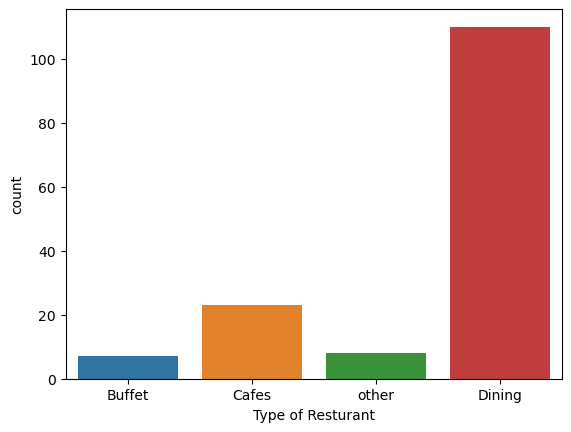

In [16]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of Resturant')

Conclusion -The Majority of the Restuarants fall into the dining category...!

In [17]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

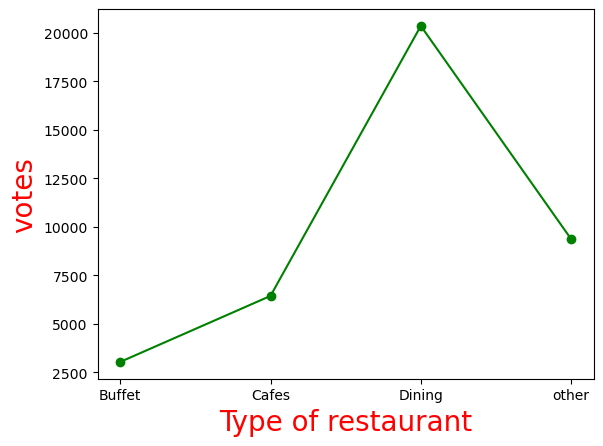

In [35]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size=20)
plt.ylabel("votes",c='red',size=20)

Conclusion - The Majority of the Restuarants recevied Ratings

In [27]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [ ]:
conclusion - 

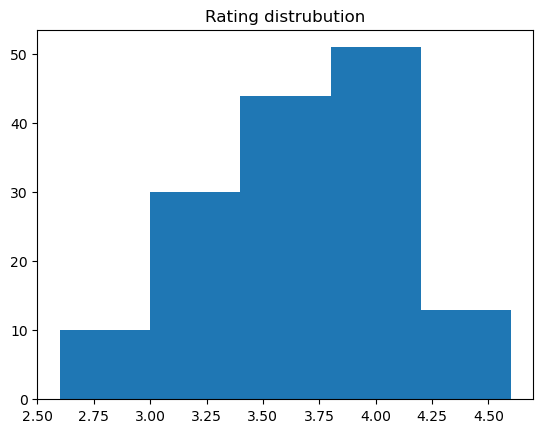

In [37]:
plt.hist(data['rate'],bins=5)
plt.title('Rating distrubution')
plt.show()


Conclusion - The Majority of the Restuarants recevied Ratings are ranging 3.5 t0 4....

Average Order Spending By Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

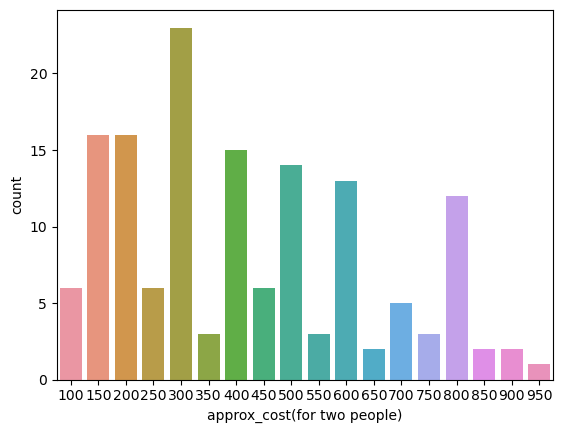

In [39]:
couple_Data = data['approx_cost(for two people)']
sns.countplot(x=couple_Data)

Conclusion - The majority of couples Prefer Restuarant with an approximate cost is  300$ Rupees

In [ ]:
which Mode Recevie Maximum Rating

<Axes: xlabel='online_order', ylabel='rate'>

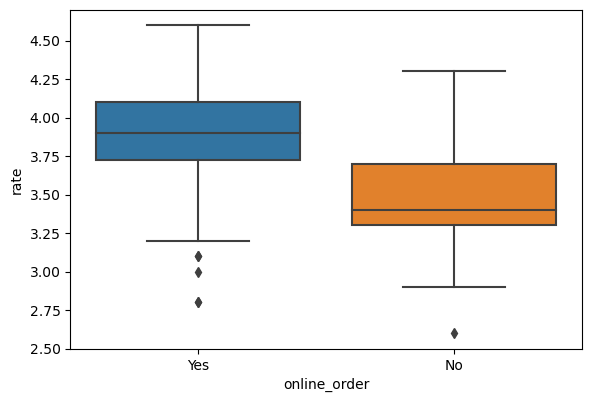

In [43]:
plt.figure(figsize=(6.6,4.4))
sns.boxplot(x='online_order', y = 'rate', data=data)

conclusion -Whether online order receive rating higher than Offline order 

In [44]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


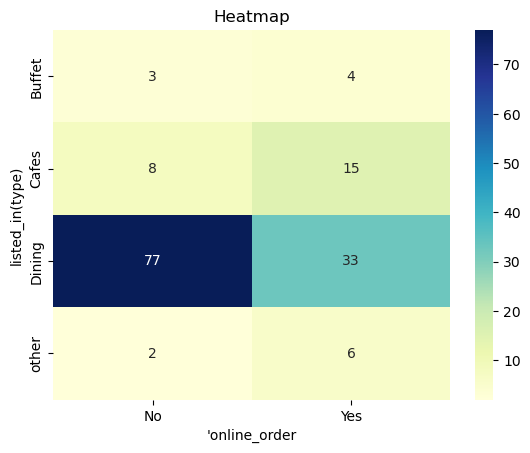

In [48]:
pivot_table = data.pivot_table(index ='listed_in(type)',columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot = True , cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("'online_order")
plt.ylabel("listed_in(type)")
plt.show()
                            

Conclusion - Dining Restuarants Primarily accept offline orders 
where as Cafes primarily receive online orders 
This Suggests that clents to prefer to place orders in person at resturants 
but Prefre Online ordering at cafres...!

These are Questions I solved in this project...


1) What type of restaurant do the majority of customers order from?

2 How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?


5) Which mode (online or offline) has received the maximum rating?


6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?
